In [1]:
%load_ext autoreload
%autoreload 2
from src import *
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [2]:
datasets = ['Abortion', 'Brexit', 'Election', 'Gun', 'Partisanship', 'Referendum_']
theta = 0.5

## EC \& ECC


In [2]:
# ec_ecc('figs/ec_ecc_dif', (100, 5, 620, 280))

## Joint Distribution

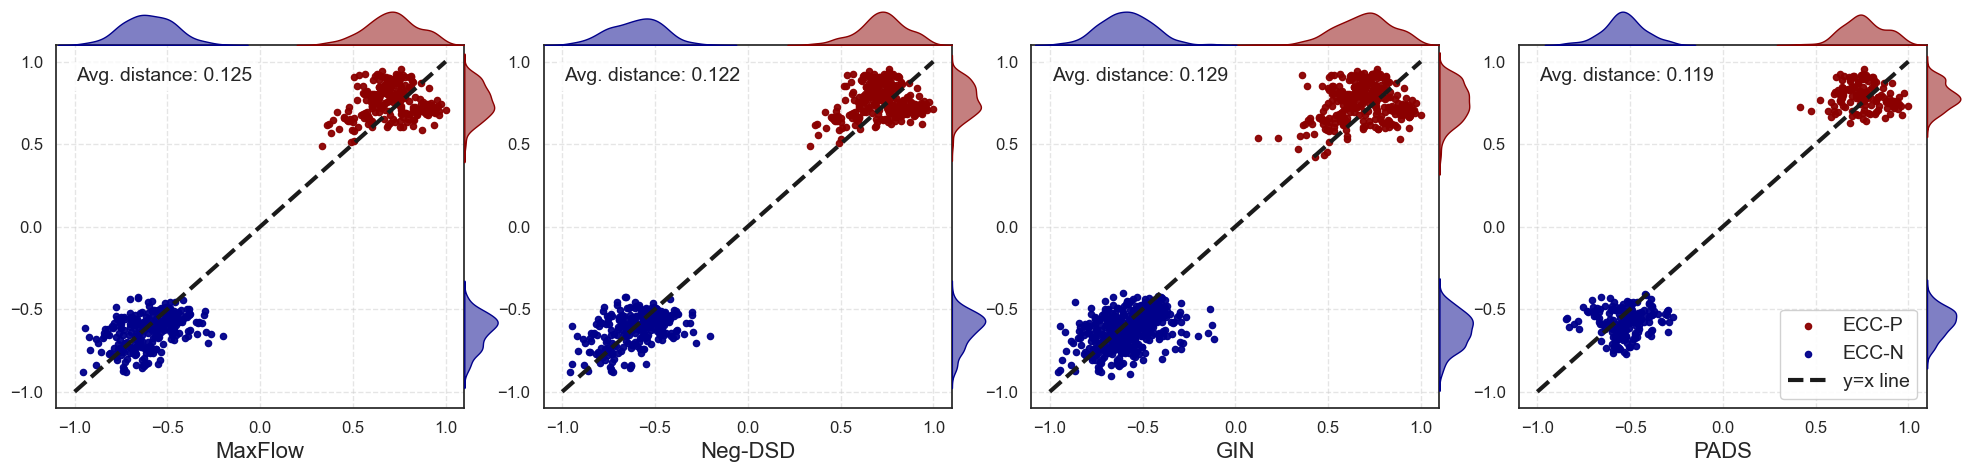

In [22]:
for d in datasets[:1]:
    joint_distribution(nx.read_gml(f'output/results-theta=0.2/{d}/graph.gml'), save_path=f'output/figs-theta=0.2/joint_distribution/{d}.pdf')

## Border

===Abortion===
===Brexit===
===Election===
===Gun===
===Partisanship===
===Referendum_===


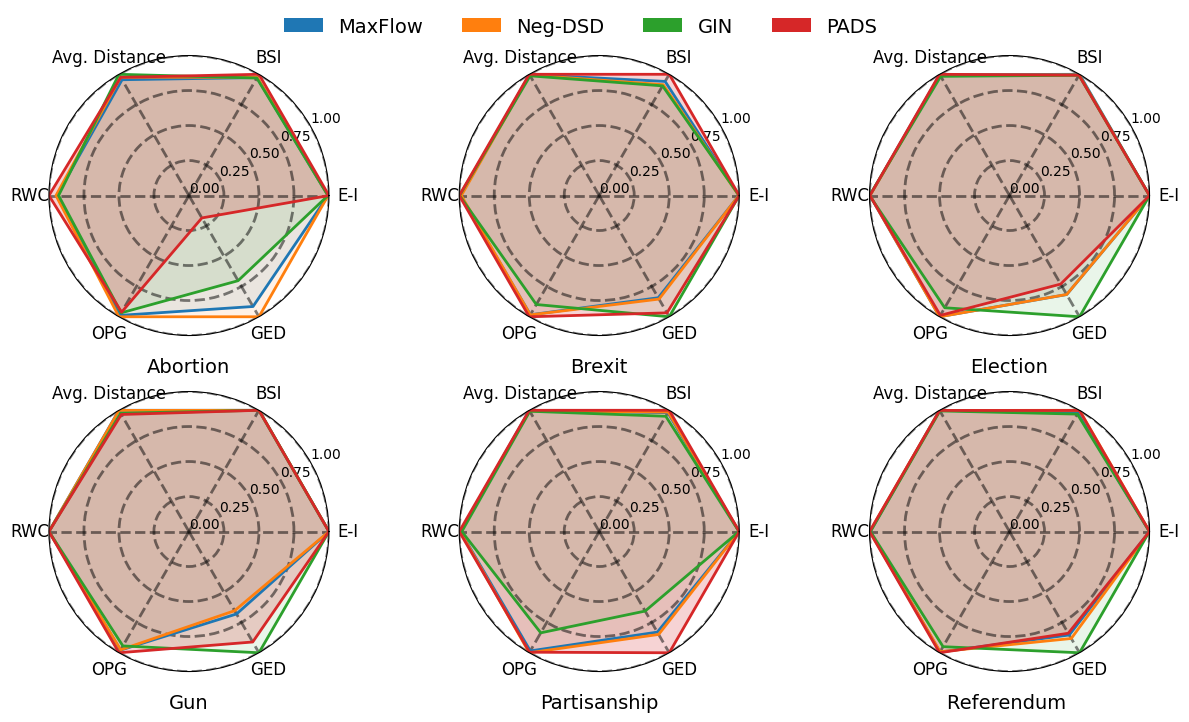

In [ ]:
# for d in datasets:
    # print(f'==={d}===')
    # border_stat(f'output/results-theta={theta}/{d}/graph.gml', save_path=f'output/figs-theta={theta}/border_statistics/{d}.csv')
radar_chart(file_path=f'output/figs-theta={theta}/border_statistics/', datasets=datasets[-2:])

## Diffusion

In [4]:
for d in datasets:
    my_diffusion(f'output/results-theta={theta}/{d}/graph.gml', f'output/figs-theta={theta}/heatmap/{d}.json')

Processing negative nodes: 100%|██████████| 402/402 [00:00<00:00, 891.38it/s]


In [ ]:
# Initialize the results DataFrame with proper dtypes
results_df = pd.DataFrame(columns=['dataset', 'method', 'popm', 'ponm', 'nopm', 'nonm'])
# Initialize empty DataFrame with correct dtypes
results_df = pd.DataFrame({col: pd.Series(dtype=dtype) for col, dtype in {'dataset': str,
    'method': str, 'popm': float, 'ponm': float, 'nopm': float, 'nonm': float}.items()})
for d in datasets:
    print(f'==={d}===')
    for m in ['maxflow_cpp_udsp', 'maxflow_cpp_wdsp', 'node2vec_gin', 'pads_cpp']:
        popm, ponm, nopm, nonm = mean_diffusion(f'output/results-theta={theta}/{d}/graph.gml', f'output/figs-theta={theta}/heatmap/{d}.json', m, filter=False)
        results_df.loc[len(results_df)] = {'dataset': d, 'method': m, 'popm': popm,
            'ponm': ponm, 'nopm': nopm, 'nonm': nonm}
results_df.to_csv(f'output/figs-theta={theta}/heatmap/reachability.csv', index=False)

===Abortion===
maxflow_cpp_udsp: popm(0.1504191782980446), ponm(0.0031306222291578143), nonpm(0.001049491246843379), nonpm(0.10716234940144154)
maxflow_cpp_wdsp: popm(0.06666058732826659), ponm(0.0007355344291415214), nonpm(0.0001331744661177722), nonpm(0.07028909822983405)
node2vec_gin: popm(0.036695446285369304), ponm(0.0003652624809607343), nonpm(8.465855720329452e-05), nonpm(0.03941923075188033)
pads_cpp: popm(0.04503866896050084), ponm(9.908733396373992e-05), nonpm(0.00019203350701542586), nonpm(0.2257428112038418)
===Brexit===
maxflow_cpp_udsp: popm(0.8582614655684584), ponm(0.21568415777632874), nonpm(0.007542675096955539), nonpm(0.22303913040750725)
maxflow_cpp_wdsp: popm(0.8577050930549389), ponm(0.10608044567334755), nonpm(0.005587796056558485), nonpm(0.4498948572875357)
node2vec_gin: popm(0.863090437526161), ponm(0.12265019056133887), nonpm(0.005909526342824758), nonpm(0.43204529953807)
pads_cpp: popm(0.8402899502554029), ponm(0.10032859320766924), nonpm(0.004515747282149806

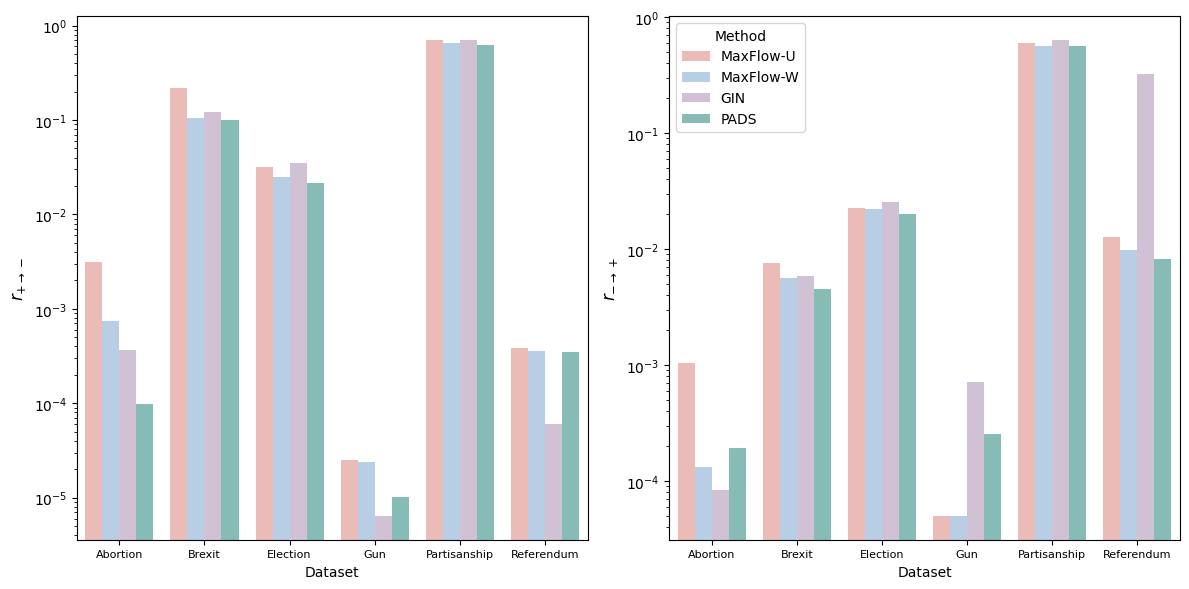

In [5]:
reachability(save_path=f'output/figs-theta={theta}/heatmap/reachability.pdf')

===Abortion===
===Brexit===
===Election===
===Gun===
===Partisanship===
===Referendum_===


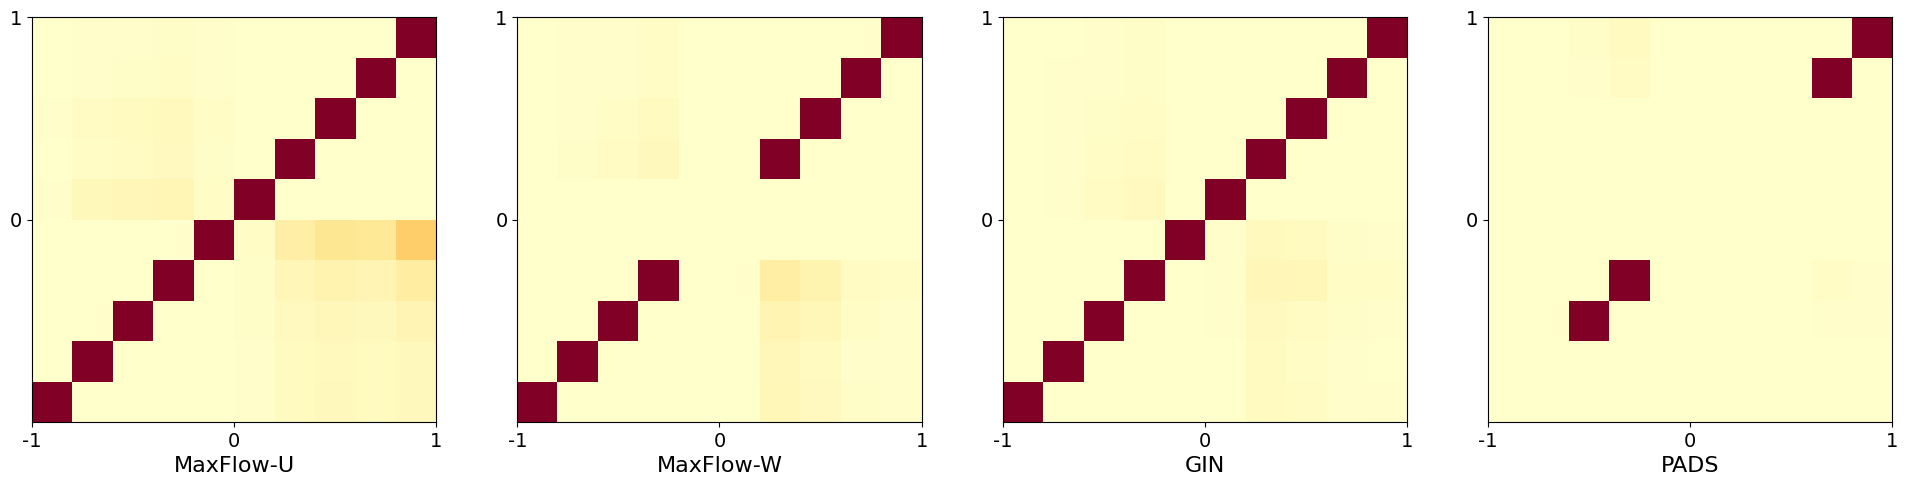

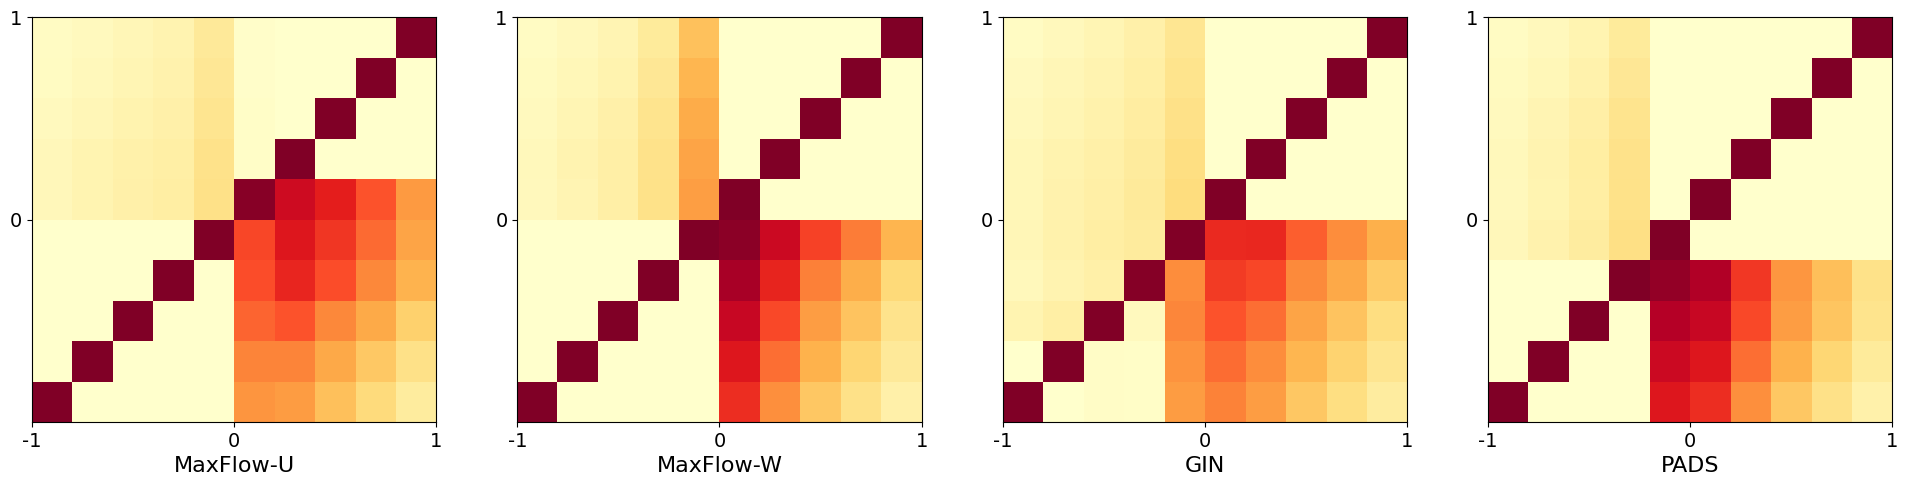

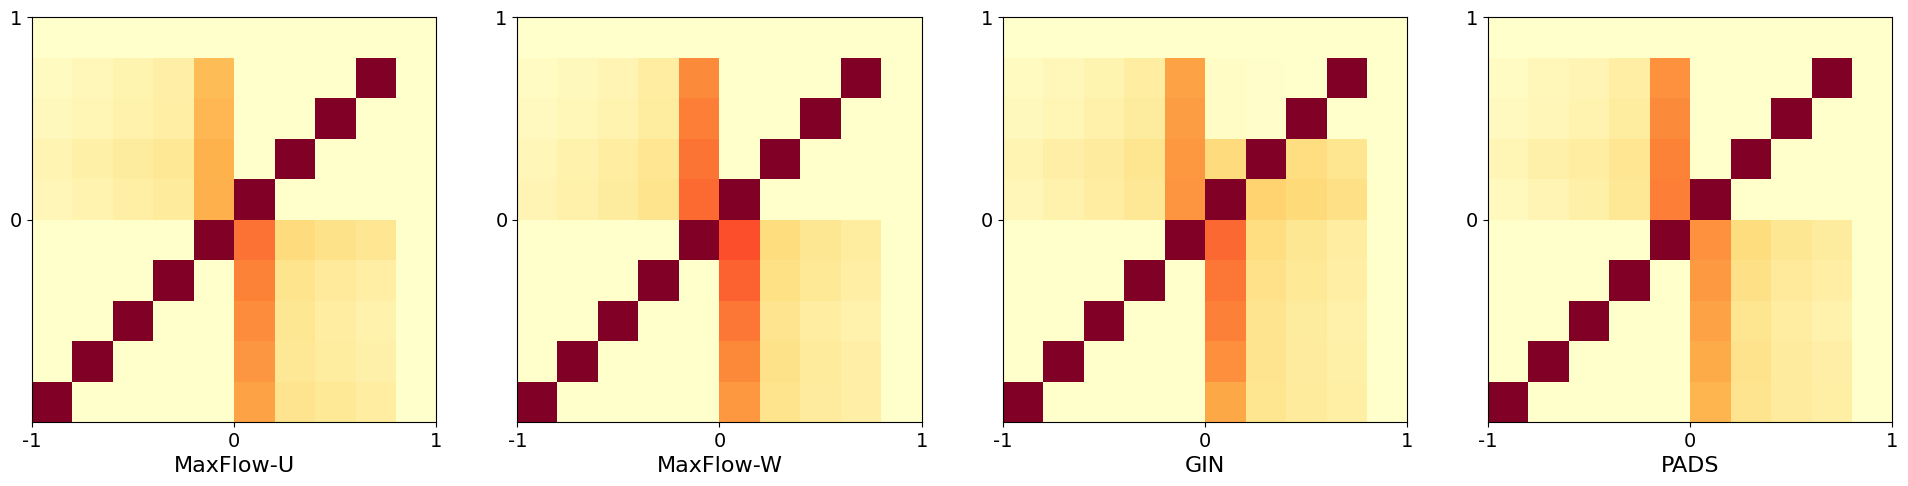

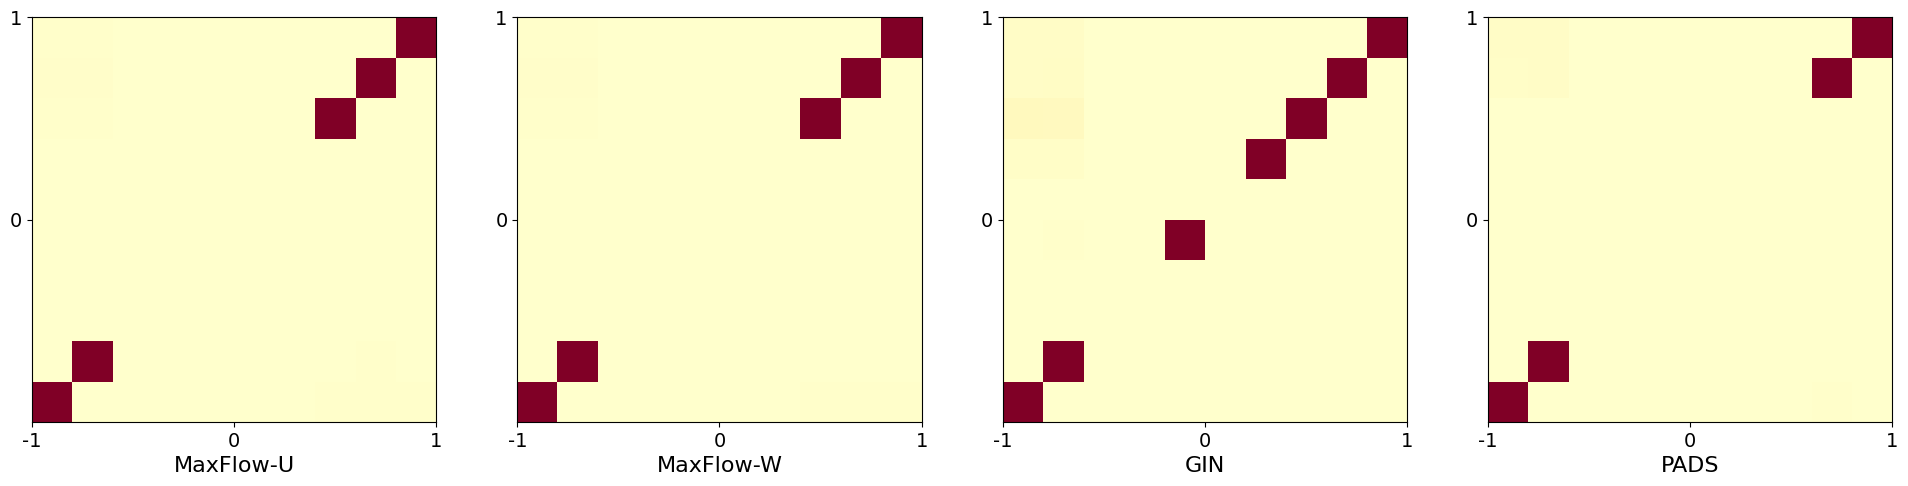

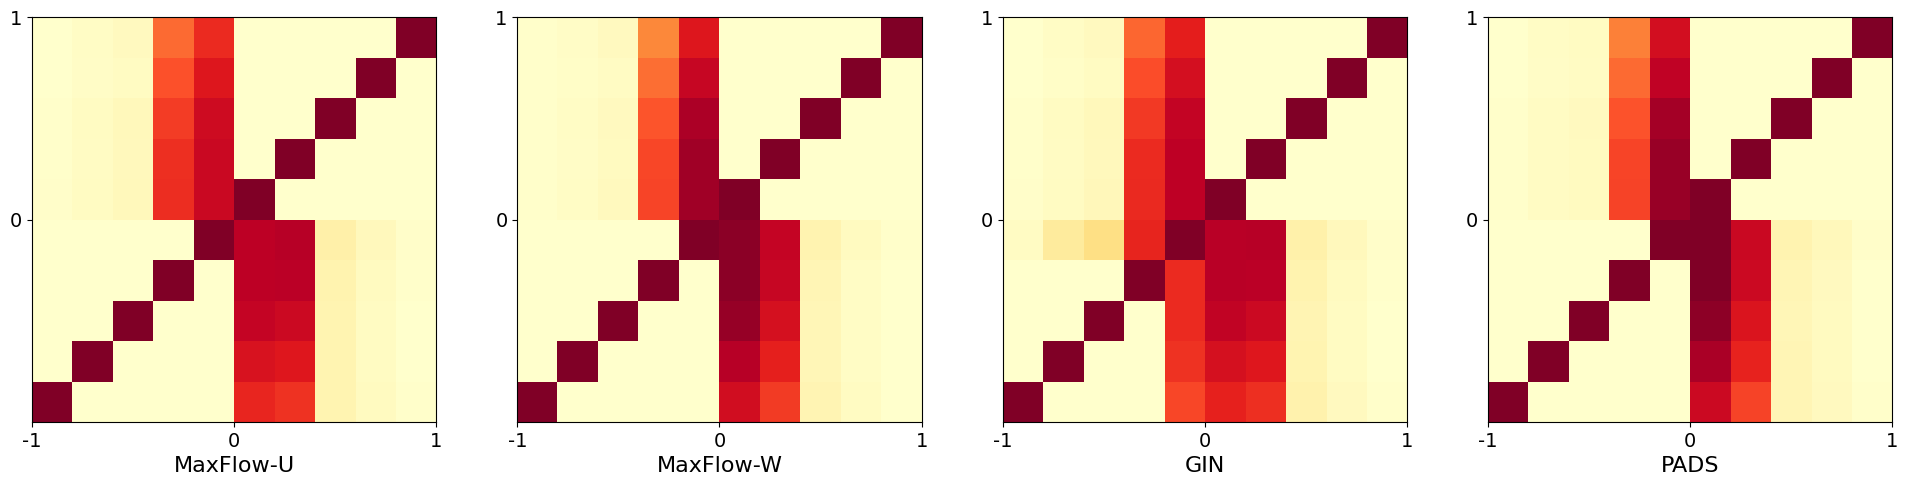

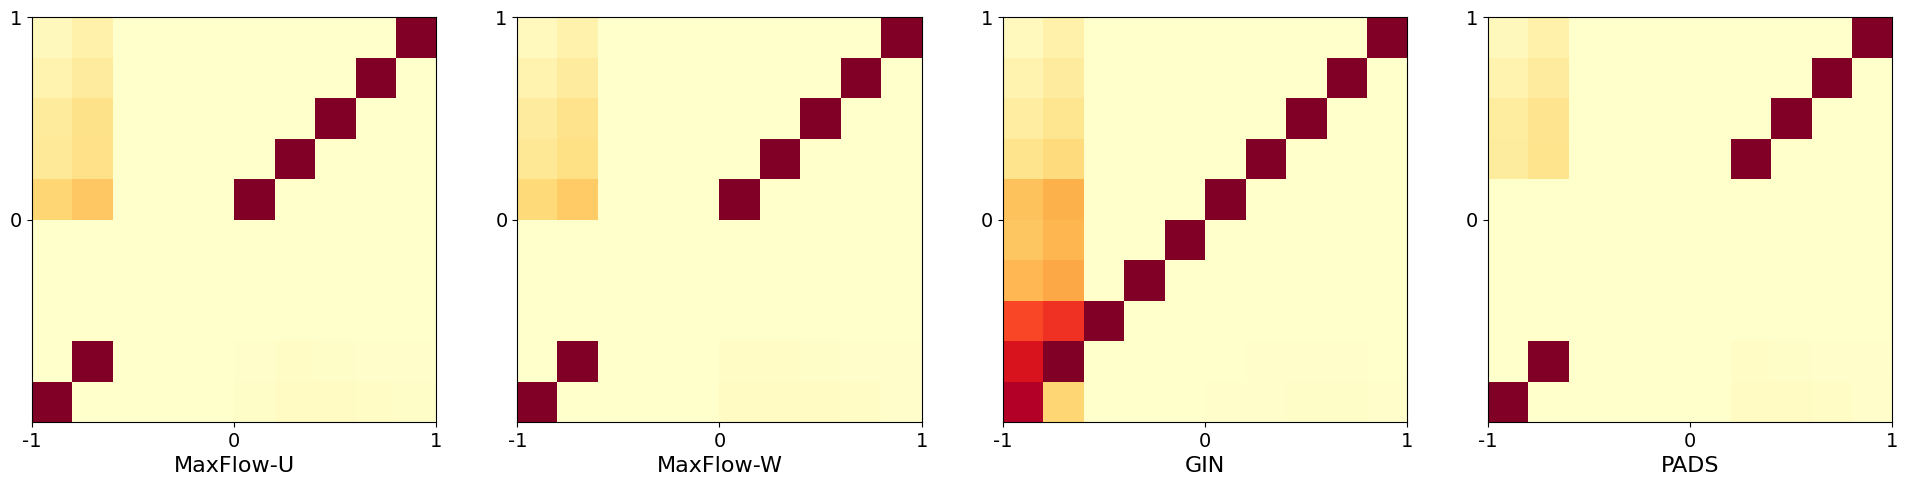

In [7]:
for d in datasets:
    print(f'==={d}===')
    create_heatmap(f'output/results-theta={theta}/{d}/graph.gml', f'output/figs-theta={theta}/heatmap/{d}.json', save_path=f'output/figs-theta={theta}/heatmap/{d}.pdf')

## F curve

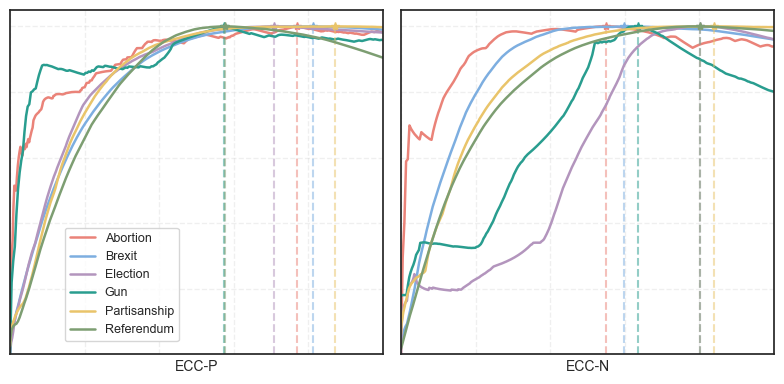

In [17]:
fs_curve(datasets, theta=theta, save_path=f'output/figs-theta={theta}/fs_curve/fs.pdf', max_neg=100)

## Theta Influence

===Partisanship===
=== Time Consumption ===
{0: 0.010198, 0.2: 0.009807, 0.5: 0.009166, 1: 0.011381, 3: 0.007511, 5: 0.004424}
=== Results ===


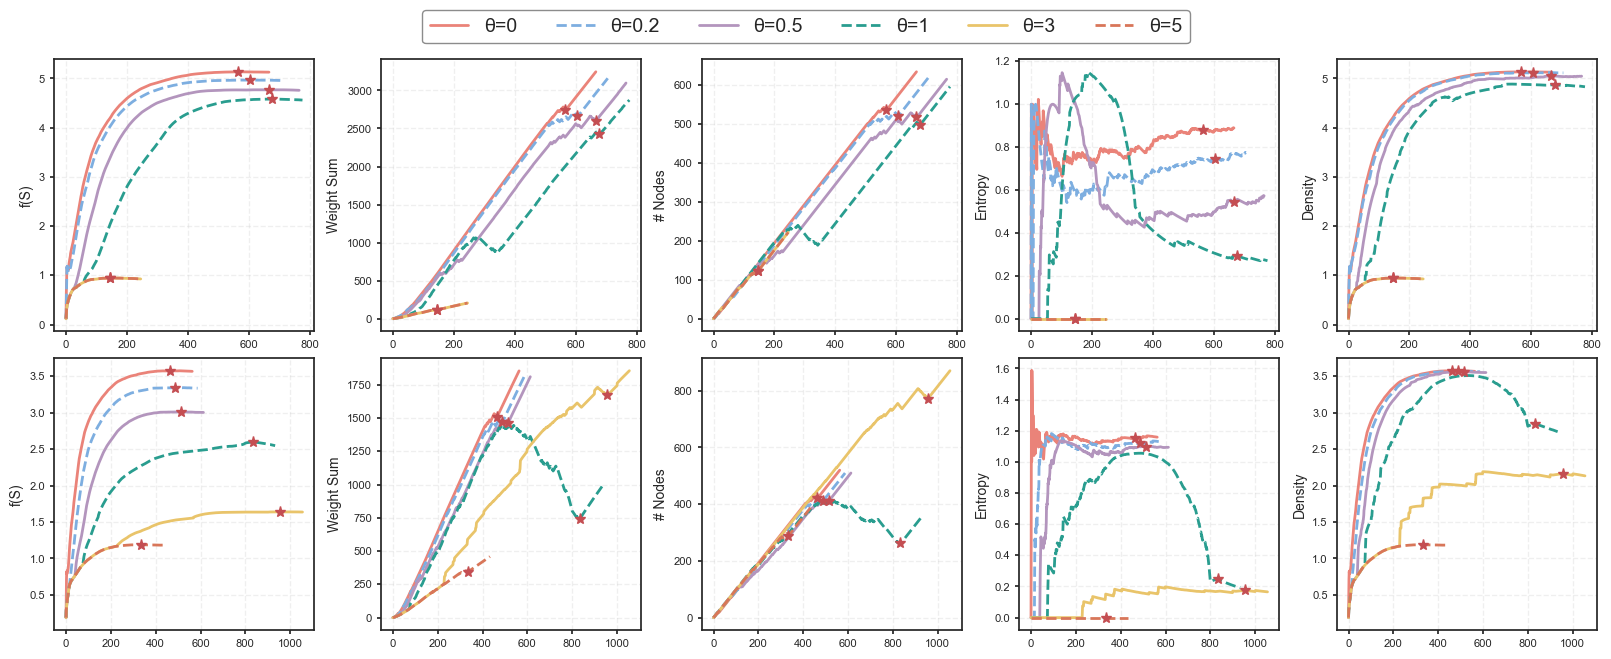

In [9]:
for d in datasets[-2:-1]:
    print(f'==={d}===')
    theta_influence(d, f'output/figs-theta={theta}/theta_influence/{d}.pdf')

## Opinions Dynamics

No Reweight: 0 nodes
Random: 530 nodes
High Degree: 530 nodes
MaxFlow-U: 546 nodes
MaxFlow-W: 555 nodes
GIN: 809 nodes
PADS: 530 nodes
No Reweight: 0 nodes
Random: 404 nodes
High Degree: 404 nodes
MaxFlow-U: 441 nodes
MaxFlow-W: 393 nodes
GIN: 378 nodes
PADS: 404 nodes


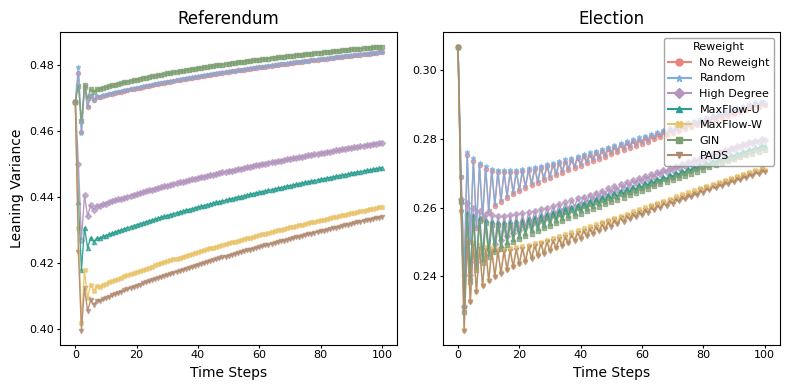

In [12]:
plot_opinion_dynamics_reweight(datasets=['Referendum_', 'Election'], file_path=f'output/results-theta={theta}', save_path=f'output/figs-theta={theta}/opinion_dynamics/reweight_fj_re.pdf', ratio=0.1, plot_type='variance')

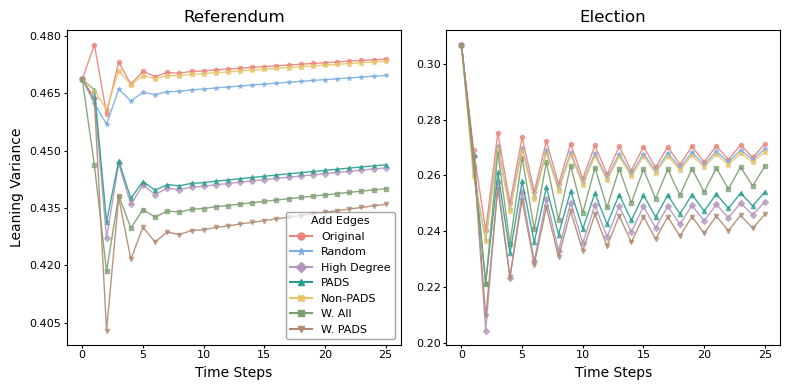

In [12]:
plot_opinion_dynamics_connections(datasets=['Referendum_', 'Election'], file_path=f'output/results-theta={theta}', save_path=f'output/figs-theta={theta}/opinion_dynamics/connections_fj_re.pdf', it=25, plot_type='variance')

## Diameter \& Polarity

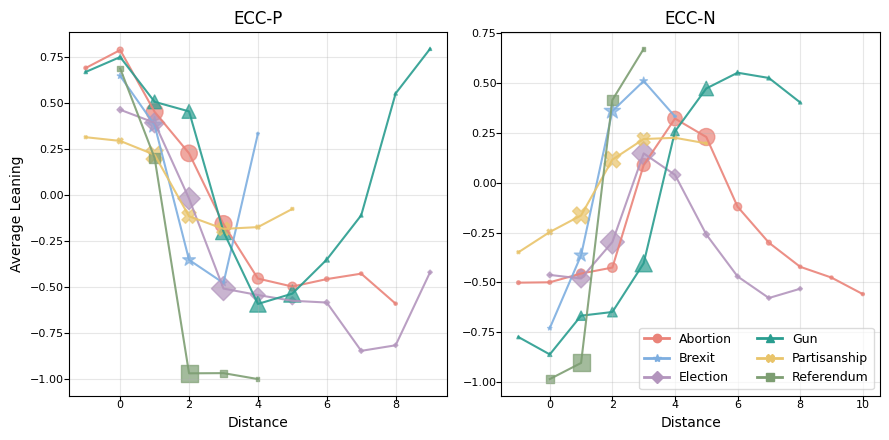

In [5]:
plot_polarity_distance(datasets, file_path=f'output/results-theta={theta}', save_path=f'output/figs-theta={theta}/polarity_diameter/polarity_distance.pdf')

## Polarity Evolution

===Election===
Added 2000 edges between PADS communities


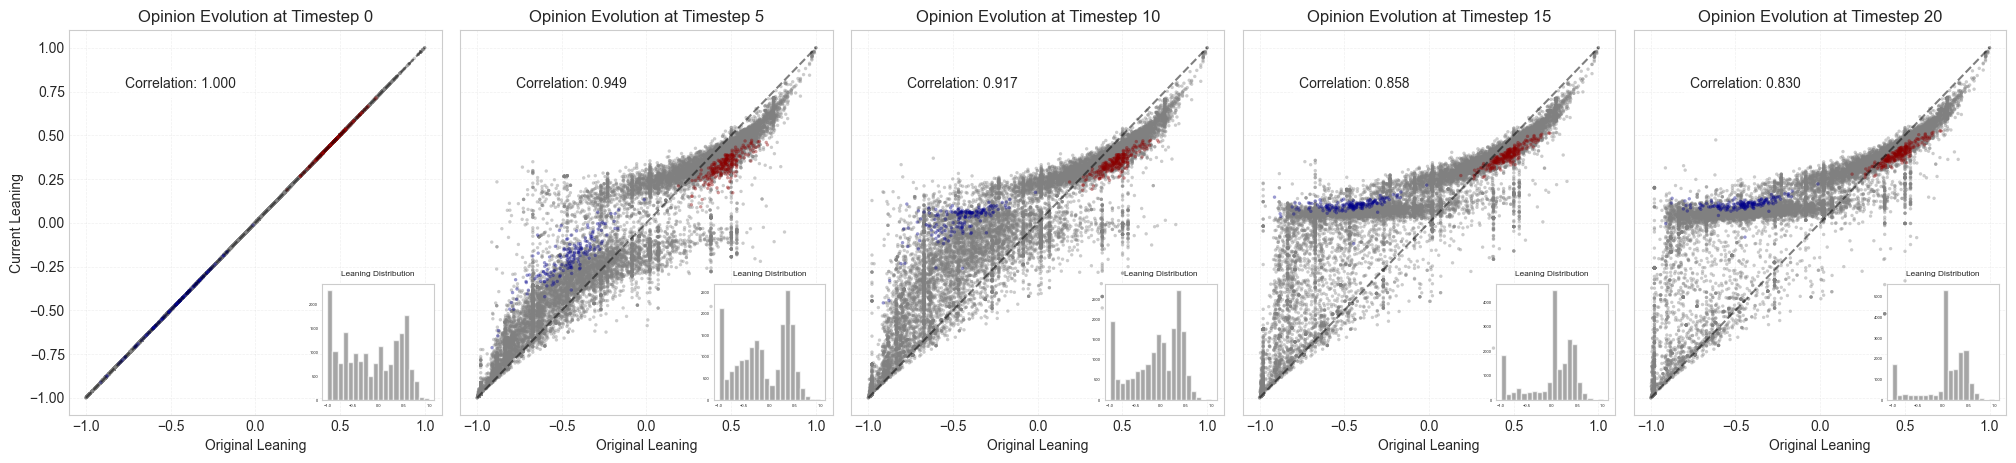

In [5]:
for d in datasets[2:3]:
    print(f'==={d}===')
    visualize_polarity_evolution(d, file_path=f'output/results-theta={theta}', save_path=f'output/figs-theta={theta}/opinion_dynamics/polarity_evolution_{d}.pdf')

## Scalibility

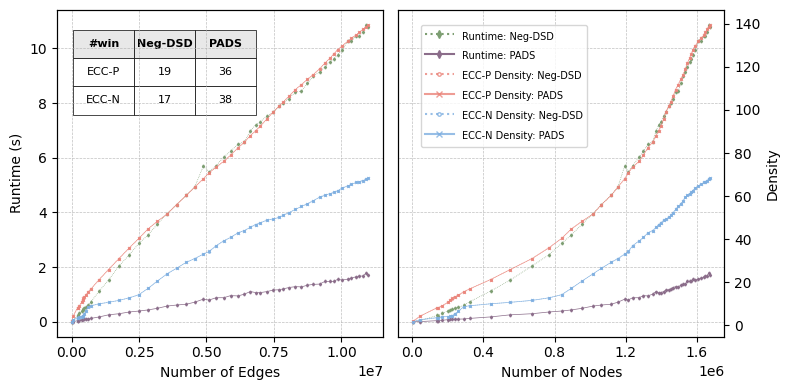

In [32]:
scalibility(run=False, save_path=f'output/figs-theta=0/scalibility/scalibility.pdf')